In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import datetime
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import glob

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_wine

The data is loaded below. Note that the data are prematurely filtered and scaled.

In [11]:
data = pd.read_excel('Data/Data_Scaled_Encoded.xlsx')

In [12]:
data.head()

,HA1,HA2,HA3,HA4,HA5,Channel,Channel2,Param1 [U1],"Param2, raw [U2]","Param2, calibrated [U2]",...,"Param9-5, Max. Param20 OP [U5]",Total P/F,Param14_X,Param14_Y,Param14_R,Param15_X,Param15_Y,Param15_R,Param16,Param17 [U6]
0,HA11,HA21,HA33,HA42,HA51,Channel1,Channel21,0.542196,-1.441712,-0.339385,...,-1.031620,1,1.372097,0.046956,1.316637,-0.140109,0.253241,-0.141896,1.570063,0.170088
1,HA11,HA21,HA33,HA42,HA51,Channel2,Channel22,0.538802,-1.153212,0.131151,...,-1.296129,1,1.372097,0.046956,1.316637,-0.140109,0.253241,-0.141896,1.570063,0.170088
2,HA11,HA21,HA33,HA42,HA51,Channel3,Channel23,-0.272764,-1.153854,0.130103,...,-0.581972,1,1.372097,0.046956,1.316637,-0.140109,0.253241,-0.141896,1.570063,-0.105728
3,HA11,HA21,HA33,HA42,HA51,Channel4,Channel24,-0.560388,-0.815129,0.682663,...,0.210060,1,1.372097,0.046956,1.316637,-0.140109,0.253241,-0.141896,1.570063,-0.381544
4,HA11,HA21,HA33,HA42,HA51,Channel5,Channel25,-0.559256,-0.815879,0.681334,...,-0.581806,1,1.372097,0.046956,1.316637,-0.140109,0.253241,-0.141896,1.570063,-0.381544


In [13]:
oneHotEncoders = ['HA1', 'HA2', 'HA3', 'HA4', 'HA5', 'Channel', 'Channel2']

s2 = pd.get_dummies(data[oneHotEncoders])
data_filtered = pd.concat([data, s2], axis=1).drop(oneHotEncoders, axis=1)
data_filtered

,Param1 [U1],"Param2, raw [U2]","Param2, calibrated [U2]","Param2, calibrated, OP [U2]","Param3, OP [U1]","Param4, OP [U3]","Param5, OP [U2]","Param6, OP [U1]","Param7, OP [U3]","Param7, OP calibrated [U3]",...,Channel2_Channel233,Channel2_Channel234,Channel2_Channel235,Channel2_Channel236,Channel2_Channel24,Channel2_Channel25,Channel2_Channel26,Channel2_Channel27,Channel2_Channel28,Channel2_Channel29
0,0.542196,-1.441712,-0.339385,-1.002696,-0.843223,0.480745,-1.541207,-1.161639,-0.851923,0.251594,...,0,0,0,0,0,0,0,0,0,0
1,0.538802,-1.153212,0.131151,0.656300,0.610637,0.525742,-1.372795,-1.161006,-1.111484,-0.252553,...,0,0,0,0,0,0,0,0,0,0
2,-0.272764,-1.153854,0.130103,-0.382334,-1.295149,-0.891121,-1.402741,-1.347576,-1.323788,-0.358370,...,0,0,0,0,0,0,0,0,0,0
3,-0.560388,-0.815129,0.682663,1.017753,0.513588,0.591916,-1.448923,-1.406725,-1.391198,-0.392070,...,0,0,0,0,1,0,0,0,0,0
4,-0.559256,-0.815879,0.681334,0.474775,0.065981,0.762453,-1.256499,-1.348209,-0.810574,0.637792,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33718,0.006084,0.332018,-0.633488,-0.242334,0.613360,1.054372,0.722061,0.737871,1.211011,1.139243,...,0,0,0,0,0,0,0,0,0,0
33719,-0.267367,0.936005,-0.080867,-0.120493,-0.296218,0.640695,0.910115,1.104422,1.632493,1.355595,...,1,0,0,0,0,0,0,0,0,0
33720,-0.274740,0.672992,-0.321502,0.139247,0.613081,1.105042,0.760065,0.737238,1.079667,0.885821,...,0,1,0,0,0,0,0,0,0,0
33721,0.260527,0.134758,-0.813909,-0.705916,0.612423,1.181803,0.766038,1.168323,1.775303,1.528811,...,0,0,1,0,0,0,0,0,0,0


Establish train and test datasets

In [14]:
X = data_filtered.drop(['Total P/F'], axis=1)
y = data_filtered['Total P/F']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [15]:
X_train

,Param1 [U1],"Param2, raw [U2]","Param2, calibrated [U2]","Param2, calibrated, OP [U2]","Param3, OP [U1]","Param4, OP [U3]","Param5, OP [U2]","Param6, OP [U1]","Param7, OP [U3]","Param7, OP calibrated [U3]",...,Channel2_Channel233,Channel2_Channel234,Channel2_Channel235,Channel2_Channel236,Channel2_Channel24,Channel2_Channel25,Channel2_Channel26,Channel2_Channel27,Channel2_Channel28,Channel2_Channel29
24156,1.348079,-0.784180,-0.192999,-0.453198,0.246752,0.751109,-1.179089,-0.552472,-0.127447,0.658685,...,0,0,0,0,0,0,0,0,0,0
474,-0.822774,-0.263188,0.512050,0.808639,0.610358,-0.075111,-0.061265,-0.363623,-0.661162,-0.685999,...,0,0,0,0,0,0,0,0,0,0
28165,-0.271060,0.112698,-0.983757,-0.621399,0.612702,0.432722,0.831221,1.168323,1.304828,0.615550,...,0,0,0,0,0,0,0,0,0,0
17698,-0.002432,0.471556,-0.505770,-0.094042,0.615520,0.457678,0.807529,0.800883,1.177306,0.970070,...,0,0,0,0,0,0,0,0,0,0
15691,-0.567201,-0.897481,0.548219,-0.200809,-1.113441,0.217564,-1.290374,-1.406345,-0.813701,0.726759,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24146,0.252868,-0.076102,-1.006876,-0.891270,-0.843503,-0.019525,0.720096,1.349256,1.807270,1.293587,...,0,0,0,1,0,0,0,0,0,0
24889,-0.273895,0.528849,-0.617679,-0.394936,0.245624,-0.772010,0.758060,0.612731,-0.150032,-1.295693,...,0,0,0,0,0,0,0,0,0,0
8452,-0.011794,-1.706224,-0.770752,-0.807038,0.516875,-0.143553,-1.497390,-1.284877,-1.350891,-0.513928,...,0,0,0,0,0,0,0,0,0,0
22553,0.248617,0.452494,-0.684841,-0.249445,0.610358,0.157819,0.725027,1.167118,1.129355,0.277205,...,0,0,0,0,0,0,0,0,0,0


In [16]:
type(y_train)

pandas.core.series.Series

Establish lists for holding variables

In [17]:
modelTimes = []
modelTrains = []
modelTests = []

### Create dummy data

In [18]:
time_i = datetime.datetime.now()
dummy_clf = DummyClassifier().fit(X_train, y_train)
time_f = datetime.datetime.now()
time = time_f - time_i
baseline_Test = dummy_clf.score(X_test, y_test)
baseline_Train = dummy_clf.score(X_train, y_train)

modelTimes.append(str(time))
modelTrains.append(baseline_Train)
modelTests.append(baseline_Test)

### Grid Search the SVC model

In [19]:
# Potential parameters for further exploration

#params = {'kernel': ['poly', 'linear'],
#         'gamma': [1.0, 10.0]}
#numParams = 2 * 2

In [20]:
# Params for grid search of SVC model
params = {'gamma': [1.0]}#, 2.0]}#, 10.0, 100.0]}
numParams = 1

In [21]:
# Find the training time and test and train accuracies for SVC model
time_i = datetime.datetime.now()
grid_svc = GridSearchCV(SVC(), param_grid=params).fit(X_train, y_train)
time_f = datetime.datetime.now()
time_ = time_f - time_i
time = time_/numParams
svc_train = grid_svc.score(X_train, y_train)
svc_test = grid_svc.score(X_test, y_test)

modelTimes.append(str(time))
modelTrains.append(svc_train)
modelTests.append(svc_test)

### Logistic Regression

In [22]:
# Find the training time and test and train accuracies for Logistic Regression
time_i = datetime.datetime.now()
lgr = LogisticRegression(max_iter=100000).fit(X_train, y_train)
time_f = datetime.datetime.now()
time = time_f - time_i
lgr_train = lgr.score(X_train, y_train)
lgr_test = lgr.score(X_test, y_test)

modelTimes.append(str(time))
modelTrains.append(lgr_train)
modelTests.append(lgr_test)

### Grid Search the KNN model

In [23]:
# Params for grid search of KNN model
params = {'knn__n_neighbors': [2,3,4,5,6]
         }
numParams = 5

In [24]:
knn_pipe = Pipeline([('scale', StandardScaler()), ('knn', KNeighborsClassifier())]).fit(X_train, y_train)

In [25]:
# Find the training time and test and train accuracies for KNN model
time_i = datetime.datetime.now()
roc_grid = GridSearchCV(knn_pipe, param_grid=params, scoring = 'roc_auc')
results = roc_grid.fit(X_train, y_train)
time_f = datetime.datetime.now()
time_ = time_f - time_i
time = time_/numParams
knn_Train = results.score(X_train, y_train)
knn_Test = results.score(X_test, y_test)

modelTimes.append(str(time))
modelTrains.append(knn_Train)
modelTests.append(knn_Test)

### Grid Search the Decision Tree model

In [26]:
# Params for grid search of Decision Tree
params = {'max_depth': [5,6],
         'min_samples_split': [2,3],
          'criterion': ['gini', 'entropy'],
          'min_samples_leaf': [2,3]
         }
numParams = 2 * 2 * 2 * 2

In [27]:
# Find the training time and test and train accuracies for Decision Tree
tree = DecisionTreeClassifier()
time_i = datetime.datetime.now()
results = GridSearchCV(tree, params).fit(X_train, y_train)
time_f = datetime.datetime.now()
time_ = time_f - time_i
time = time_/numParams
DT_Train = results.score(X_train, y_train)
DT_Test = results.score(X_test, y_test)

modelTimes.append(str(time))
modelTrains.append(DT_Train)
modelTests.append(DT_Test)

### Display results in a table

In [28]:
# Compile the test times and scores into a dataframe for presentation
res_dict = {'model': ['Dummy', 'SVC', 'Logistic Regression', 'KNN', 'Decision Tree'],
           'train score': modelTrains,
           'test score': modelTests,
           'average fit time': modelTimes}
results_df = pd.DataFrame(res_dict).set_index('model')
results_df

,train score,test score,average fit time
model,,,
Dummy,0.969595,0.965366,0:00:00.003800
SVC,1.000000,0.965366,0:16:38.098618
Logistic Regression,0.996086,0.994663,0:00:01.840389
KNN,0.999358,0.977057,0:00:12.236664
Decision Tree,0.999684,0.999170,0:00:06.071313


['0', '00', '00.003800']


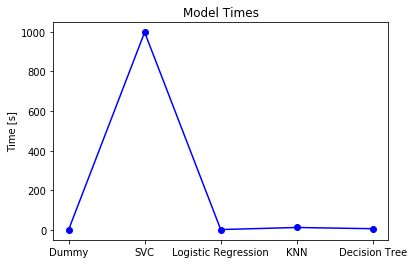

In [29]:
# Plot the train times for each model
plt.figure()
modelTimes_ = []
for modelTime in modelTimes:
    modelTimes__ = modelTime.split(':')
    modelTimes_.append(float(modelTimes__[0])*3600 + float(modelTimes__[1])*60 + float(modelTimes__[2]))
plt.plot(modelTimes_, 'b')
plt.plot(modelTimes_, 'bo')
plt.xticks(ticks=[0,1,2,3,4], labels=['Dummy', 'SVC', 'Logistic Regression', 'KNN', 'Decision Tree'])
plt.ylabel('Time [s]')
plt.title('Model Times')
plt.savefig('Plots/Times_2.png')
print(modelTimes[0].split(':'))

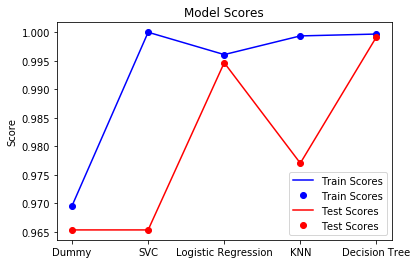

In [30]:
# Plot the train scores for each model
plt.figure()
plt.plot(modelTrains, 'b', label='Train Scores')
plt.plot(modelTrains, 'bo', label='Train Scores')
plt.plot(modelTests, 'r', label='Test Scores')
plt.plot(modelTests, 'ro', label='Test Scores')
plt.xticks(ticks=[0,1,2,3,4], labels=['Dummy', 'SVC', 'Logistic Regression', 'KNN', 'Decision Tree'])
plt.legend()

plt.ylabel('Score')
plt.title('Model Scores')
plt.savefig('Plots/Scores_2.png')

In [31]:
tree = results.best_estimator_
tree

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2)

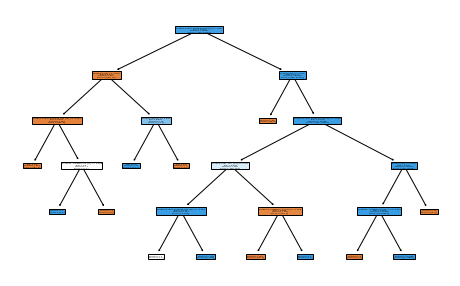

In [32]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree

# Plot the decision tree
plt.figure(figsize=(8,5))
plot_tree(tree,filled=True, feature_names = list(X.columns))  
fileList = glob.glob('Tress/Tree*.png')
maxNum = 0
for file in fileList:
    num = int(file.split('Tree')[1][:-4])
    if num >= maxNum:
        maxNum = num
newNum = maxNum + 1
plt.savefig('Trees/Tree%i.png'%newNum,format='png',bbox_inches = "tight", dpi=500)

In [33]:
# Compile results into a dataframe and export the dataframe as excel
feature_names = X.columns.values
coef_df = pd.DataFrame({'feature': feature_names, 'coefs': lgr.coef_[0]})
coef_df['coefs'] = coef_df['coefs']#.apply(abs)
coef_df = coef_df.sort_values(by = 'coefs', ascending = False)
coef_df[:80]
fileList = glob.glob('Coefficient_Outputs/Coefficients*.xlsx')
maxNum = 0
for file in fileList:
    num = int(file.split('_v')[1][:-5])
    if num >= maxNum:
        maxNum = num
newNum = maxNum + 1
coef_df.to_excel('Coefficient_Outputs/Coefficients_v%i.xlsx'%newNum)

### Neural Network

In [34]:
import tensorflow as tf

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [35]:
# Define a model with a few layers and many neutrons
model = Sequential([Dense(200, activation = 'relu'),
                    Dense(200, activation = 'relu'),
                    Dense(200, activation = 'relu'),
                    Dense(200, activation = 'relu'),
                   Dense(1, activation = 'sigmoid')])
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X, y, validation_split = 0.3, epochs = 100, verbose = 0)

In [36]:
history.history['accuracy']

[0.04215029999613762,
 0.04159959405660629,
 0.04159959405660629,
 0.04159959405660629,
 0.04159959405660629,
 0.04159959405660629,
 0.04159959405660629,
 0.04159959405660629,
 0.04159959405660629,
 0.04159959405660629,
 0.04159959405660629,
 0.04159959405660629,
 0.04159959405660629,
 0.04159959405660629,
 0.04159959405660629,
 0.04159959405660629,
 0.04159959405660629,
 0.04159959405660629,
 0.04159959405660629,
 0.04159959405660629,
 0.04159959405660629,
 0.04159959405660629,
 0.04159959405660629,
 0.04159959405660629,
 0.04159959405660629,
 0.04159959405660629,
 0.04159959405660629,
 0.04159959405660629,
 0.04159959405660629,
 0.04159959405660629,
 0.04159959405660629,
 0.04159959405660629,
 0.04159959405660629,
 0.04159959405660629,
 0.04159959405660629,
 0.04159959405660629,
 0.04159959405660629,
 0.04159959405660629,
 0.04159959405660629,
 0.04159959405660629,
 0.04159959405660629,
 0.04159959405660629,
 0.04159959405660629,
 0.04159959405660629,
 0.04159959405660629,
 0.0415995